In [1]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt

* Gradient descent: tìm minimum của hàm bằng cách đi ngược chiều gradient
* Dùng `y.backward()` và `x.grad` để tính đạo hàm của `y` theo `x`

In [2]:
def f(x):
    return x**2

In [3]:
def plot(f, x0):
    x = np.linspace(-5, 5, 100)
    y = f(x)
    y0 = f(x0)
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'b')
    plt.plot(x0, y0, 'ro')
    plt.show()

In [4]:
x = torch.tensor(4.5, requires_grad=True)
eta = 0.05

`.backward()` [documentation](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html): "This function accumulates gradients in the leaves - you might need to zero `.grad` attributes or set them to `None` before calling it" $\rightarrow$ default behavior khi gọi `.backward()` là cộng gradient tính được vào `x.grad` hiện tại nên mỗi lần trước khi gọi `.backward()` cần phải reset `x.grad` về 0 bằng cách set `x.grad = None`

In [5]:
y = f(x)
y.backward()
print(f'x.grad after 1st y.backward() call: {x.grad}')
y = f(x)
y.backward()
print(f'x.grad after 2nd y.backward() call: {x.grad}')
y = f(x)
y.backward()
print(f'x.grad after 3rd y.backward() call: {x.grad}')

x.grad = None # reset gradient
print(f'x.grad after reset gradient: {x.grad}')
y = f(x)
y.backward()
print(f'x.grad after 4th y.backward() call: {x.grad}')
x.grad = None # reset gradient

x.grad after 1st y.backward() call: 9.0
x.grad after 2nd y.backward() call: 18.0
x.grad after 3rd y.backward() call: 27.0
x.grad after reset gradient: None
x.grad after 4th y.backward() call: 9.0


Cell này thực hiện 1 vòng lặp của thuật toán gradient descent (chạy đi chạy lại cell này để converge về minimum)

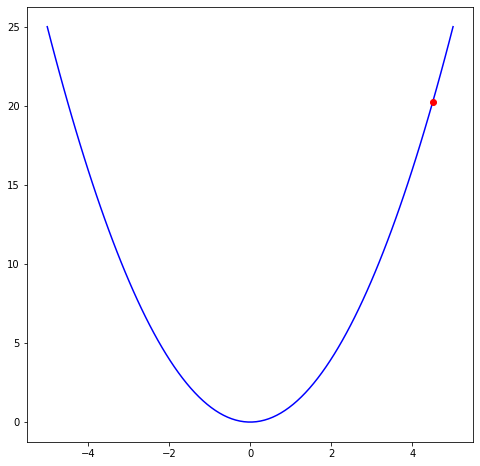

x = 4.5
f(x) = 20.25
dy/dx = 9.0


In [6]:
plot(f, x.detach().numpy())

y = f(x) # forward
y.backward() # compute gradient
print('x = {}'.format(x))
print('f(x) = {}'.format(y))
print('dy/dx = {}'.format(x.grad))
with torch.no_grad():
    x -= eta * x.grad # update
x.grad = None # reset gradient

(`x -= eta * x.grad` là để update `x` nên không cần track gradient $\rightarrow$ wrap trong `torch.no_grad()`)

## `torch.optim`

`torch.optim` implement nhiều thuật toán (gradient-based) optimization khác nhau, trong đó có thuật toán gradient descent (`torch.optim.SGD`). Optimizer của `torch.optim` giúp thực hiện bước update (`.step()`) và reset gradient (`.zero_grad()`) một cách đơn giản và ngắn gọn.

In [7]:
x = torch.tensor(4.5, requires_grad=True)
eta = 0.05

Đầu tiên tạo optimizer thuật toán SGD và truyền vào các biến cần optimize

In [8]:
optimizer = torch.optim.SGD([x], # specifies what Tensors should be optimized 
                            lr=eta) # learning rate

Sau khi tính gradient với `y.backward()`
* thay vì phải tự cập nhật `x` bằng cách
```python
with torch.no_grad():
    x -= eta * x.grad
```
ta chỉ cần gọi `optimizer.step()`
* thay vì phải set gradient của tất cả các biến về `None` ta chỉ cần gọi `optimizer.zero_grad()` để reset gradient

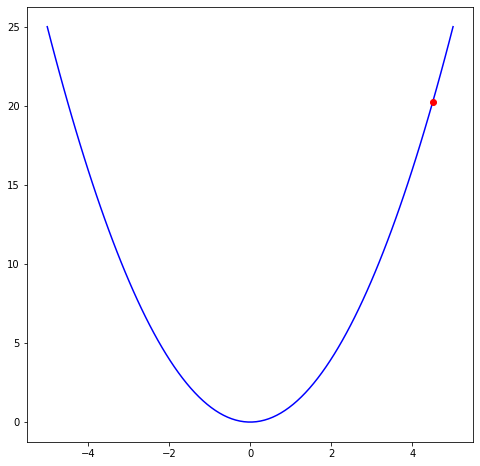

x = 4.5
f(x) = 20.25
dy/dx = 9.0


In [9]:
# chạy đi chạy lại cell này để converge về minimum
plot(f, x.detach().numpy())

y = f(x) # forward
y.backward() # compute gradient
print('x = {}'.format(x))
print('f(x) = {}'.format(y))
print('dy/dx = {}'.format(x.grad))
optimizer.step() # update
optimizer.zero_grad() # reset gradient